Column names: Index(['Year', 'Profit(Rs '000)'], dtype='object')
Mean of Profit(Rs '000): 1021.99
Standard Deviation of Profit(Rs '000): 487.96
Mean of standardized data: -0.00
Standard Deviation of standardized data: 1.00


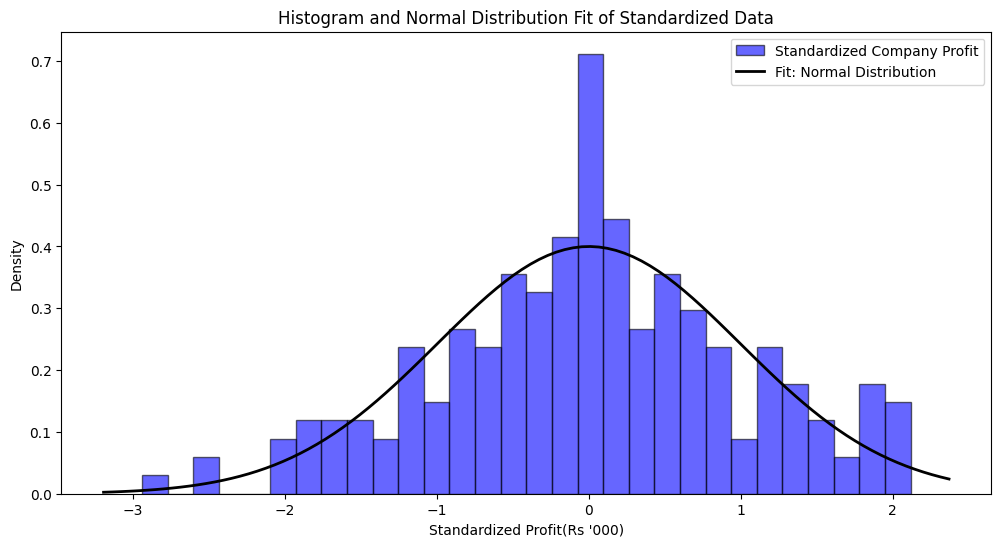

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data
file_path = '/home/sahitya-jadala/Downloads/CompanyABCProfit.csv'
data = pd.read_csv(file_path)

# Print column names to verify
print("Column names:", data.columns)

# Use the correct column name from the CSV file
column_name = 'Profit(Rs \'000)'

# Check if the column exists in the DataFrame
if column_name not in data.columns:
    raise KeyError(f"The column '{column_name}' does not exist in the CSV file. Please check the column names.")

# Extract the data for the specified column
data_column = data[column_name].dropna()  # Drop any missing values

# Compute mean and standard deviation
mean = data_column.mean()
std = data_column.std()

# Print mean and standard deviation
print(f"Mean of {column_name}: {mean:.2f}")
print(f"Standard Deviation of {column_name}: {std:.2f}")

# Standardize the data
standardized_data = (data_column - mean) / std

# Print the new mean and standard deviation (should be close to 0 and 1)
print(f"Mean of standardized data: {standardized_data.mean():.2f}")
print(f"Standard Deviation of standardized data: {standardized_data.std():.2f}")

# Plot the distribution of the standardized data
plt.figure(figsize=(12, 6))

# Plot the histogram of the standardized data
plt.hist(standardized_data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Standardized Company Profit')

# Fit a normal distribution to the standardized data
mu, std_fit = norm.fit(standardized_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std_fit)
plt.plot(x, p, 'k', linewidth=2, label='Fit: Normal Distribution')

# Add labels and legend
plt.xlabel('Standardized ' + column_name)
plt.ylabel('Density')
plt.title('Histogram and Normal Distribution Fit of Standardized Data')
plt.legend()

# Show the plot
plt.show()
